---
format:
  html:
    self-contained: true
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/ha_1.csv")
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,1
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,0
2,Miles Wolf,62,0,3,130,263,1,97,1
3,Mikaila Block,43,1,1,115,303,1,181,0
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,0
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,1
200,Mr. Foster Zieme,51,1,3,94,227,1,154,0
201,Lashanda Hagenes,42,1,2,120,295,1,162,0
202,Levern Trantow III,35,0,1,138,183,1,182,0


In [ ]:
X = df[["age", 'chol']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['age', 'chol'])
  ],
  remainder = "drop"
)

log_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', LogisticRegression())
    ]
)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

newPatient = pd.DataFrame(list(zip([55] * 100, range(200,500,5))), columns = ['age', 'chol'])
prob = log.predict_proba(newPatient)
print(list(zip(range(200,500,5), prob)))

[(200, array([0.56884078, 0.43115922])), (205, array([0.56523255, 0.43476745])), (210, array([0.5616174, 0.4383826])), (215, array([0.55799569, 0.44200431])), (220, array([0.55436781, 0.44563219])), (225, array([0.55073412, 0.44926588])), (230, array([0.54709501, 0.45290499])), (235, array([0.54345086, 0.45654914])), (240, array([0.53980205, 0.46019795])), (245, array([0.53614897, 0.46385103])), (250, array([0.53249201, 0.46750799])), (255, array([0.52883155, 0.47116845])), (260, array([0.52516799, 0.47483201])), (265, array([0.52150171, 0.47849829])), (270, array([0.51783312, 0.48216688])), (275, array([0.51416261, 0.48583739])), (280, array([0.51049057, 0.48950943])), (285, array([0.50681739, 0.49318261])), (290, array([0.50314348, 0.49685652])), (295, array([0.49946923, 0.50053077])), (300, array([0.49579504, 0.50420496])), (305, array([0.4921213, 0.5078787])), (310, array([0.48844841, 0.51155159])), (315, array([0.48477677, 0.51522323])), (320, array([0.48110677, 0.51889323])), (32

In [ ]:
coef = log_pipeline.named_steps['classification'].coef_[0]
intercept_1 = log_pipeline.named_steps['classification'].intercept_[0]

slope_1 = coef[0]/coef[1]

According to this model, a 55 year old patient's cholesterol must be about 295 to be predicted to have heart disease. There is no level of cholesterol (within our data range) that provides a 90% chance

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', LinearDiscriminantAnalysis())
    ]
)

lda = lda_pipeline.fit(X_train, y_train)

newPatient = pd.DataFrame(list(zip([55] * 100, range(200,500,5))), columns = ['age', 'chol'])
prob = lda.predict_proba(newPatient)
print(list(zip(range(200,500,5), prob)))

[(200, array([0.54272818, 0.45727182])), (205, array([0.54109588, 0.45890412])), (210, array([0.5394627, 0.4605373])), (215, array([0.53782867, 0.46217133])), (220, array([0.53619383, 0.46380617])), (225, array([0.53455821, 0.46544179])), (230, array([0.53292184, 0.46707816])), (235, array([0.53128477, 0.46871523])), (240, array([0.52964703, 0.47035297])), (245, array([0.52800864, 0.47199136])), (250, array([0.52636965, 0.47363035])), (255, array([0.5247301, 0.4752699])), (260, array([0.52309001, 0.47690999])), (265, array([0.52144942, 0.47855058])), (270, array([0.51980837, 0.48019163])), (275, array([0.51816689, 0.48183311])), (280, array([0.51652502, 0.48347498])), (285, array([0.51488279, 0.48511721])), (290, array([0.51324024, 0.48675976])), (295, array([0.51159741, 0.48840259])), (300, array([0.50995432, 0.49004568])), (305, array([0.50831102, 0.49168898])), (310, array([0.50666754, 0.49333246])), (315, array([0.50502392, 0.49497608])), (320, array([0.50338018, 0.49661982])), (32

In [ ]:
coef = lda_pipeline.named_steps['classification'].coef_[0]
intercept_2 = lda_pipeline.named_steps['classification'].intercept_[0]

slope_2 = coef[0]/coef[1]

This time, a 55 year old patient needs to have a cholesterol of about 305 to be predicted to have the disease

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
    [
        ('classification', SVC(kernel='linear', C = 2, probability = True))
    ]
)

svc = svc_pipeline.fit(X_train, y_train)

newPatient = pd.DataFrame(list(zip([55] * 100, range(200,500,5))), columns = ['age', 'chol'])
prob = svc.predict_proba(newPatient)
print(list(zip(range(200,500,5), prob)))

[(200, array([0.55957491, 0.44042509])), (205, array([0.55719256, 0.44280744])), (210, array([0.55480621, 0.44519379])), (215, array([0.55241604, 0.44758396])), (220, array([0.55002225, 0.44997775])), (225, array([0.54762503, 0.45237497])), (230, array([0.54522459, 0.45477541])), (235, array([0.54282111, 0.45717889])), (240, array([0.54041478, 0.45958522])), (245, array([0.53800581, 0.46199419])), (250, array([0.53559436, 0.46440564])), (255, array([0.53318064, 0.46681936])), (260, array([0.53076482, 0.46923518])), (265, array([0.5283471, 0.4716529])), (270, array([0.52592763, 0.47407237])), (275, array([0.52350661, 0.47649339])), (280, array([0.5210842, 0.4789158])), (285, array([0.51866056, 0.48133944])), (290, array([0.51623586, 0.48376414])), (295, array([0.51381026, 0.48618974])), (300, array([0.5113839, 0.4886161])), (305, array([0.50895694, 0.49104306])), (310, array([0.50652951, 0.49347049])), (315, array([0.5, 0.5])), (320, array([0.5, 0.5])), (325, array([0.5, 0.5])), (330, a

In [ ]:
coef = svc_pipeline.named_steps['classification'].coef_[0]
intercept_3 = svc_pipeline.named_steps['classification'].intercept_[0]

slope_3 = coef[0]/coef[1]

Based on this model, a doctor would predict heart disease somewhere around 325 cholesterol.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

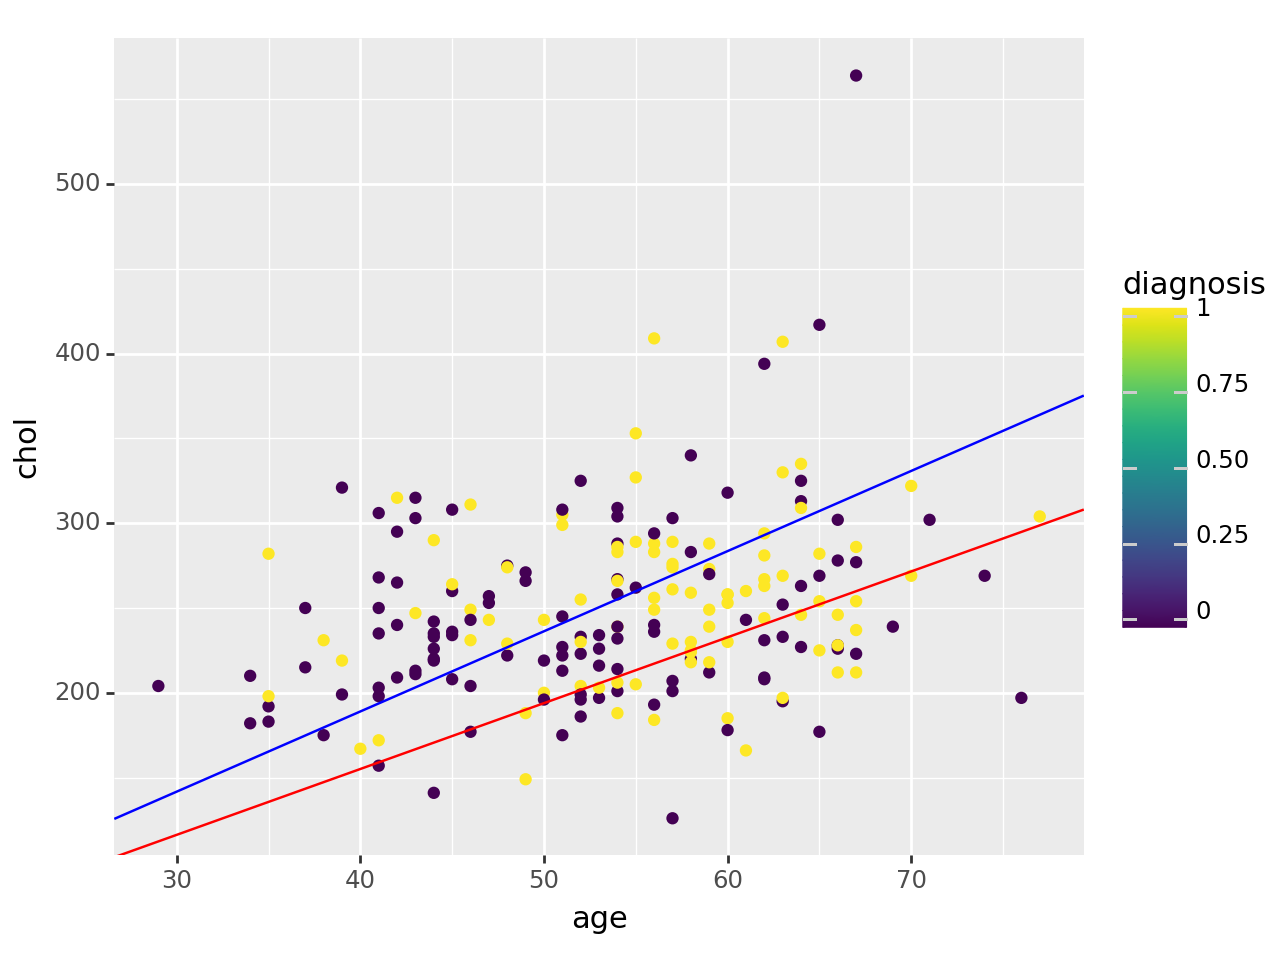

<Figure Size: (640 x 480)>

In [ ]:
import plotnine as p9

(p9.ggplot(df, p9.aes(x = "age", y = "chol", color = 'diagnosis')) + p9.geom_point() + p9.geom_abline(intercept=intercept_1, slope=slope_1, color = "red")
+ p9.geom_abline(intercept=intercept_2, slope=slope_2, color = "blue") + p9.geom_abline(intercept=intercept_3, slope=slope_3, color = "purple"))